In [1]:
from altaipony.lcio import from_mast, from_path
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Find and download the TargetPixelFile for your light curve:

In [2]:
flc = from_mast("10002792", mode="TPF", c=2, mission="Kepler")

Loading KWallet
Loading SecretService
Loading Windows
Loading chainer
Loading macOS
/usr/lib/python3.6/importlib/_bootstrap_external.py:487: ResourceWarning: unclosed <socket.socket fd=58, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1000/bus>
  code = marshal.loads(data)
/usr/lib/python3.6/importlib/_bootstrap_external.py:487: ResourceWarning: unclosed <socket.socket fd=59, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1000/bus>
  code = marshal.loads(data)
/usr/lib/python3.6/importlib/_bootstrap_external.py:487: ResourceWarning: unclosed <socket.socket fd=60, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1000/bus>
  code = marshal.loads(data)
/usr/lib/python3.6/importlib/_bootstrap_external.py:487: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1000/bus>
  code = marshal.loads(data)
Foun

Find the gaps in the light curve to inform the de-trending algorithm. 

The de-trending splits the light curve in continuous chunks to avoid flukes from over-fitting.

In [3]:
flcd = flc.detrend("savgol")

Now you can visually compare the results:

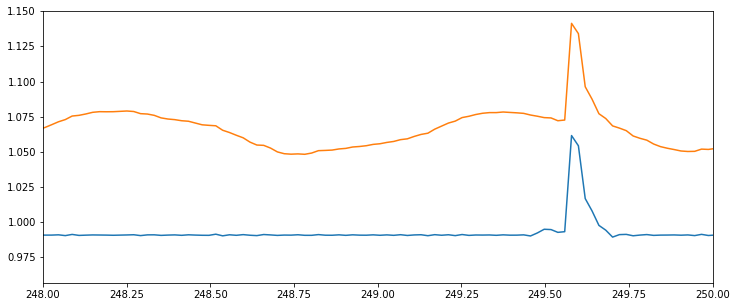

In [6]:
plt.figure(figsize=(12,5))

plt.plot(flcd.time,flcd.detrended_flux / np.nanmedian(flcd.detrended_flux))
plt.plot(flcd.time, flcd.flux / np.nanmedian(flcd.flux)+0.05)
plt.xlim(248,250);

The above figure shows a flare that we can now try to find in the de-trended light curve:

In [5]:
flcd = flcd.find_flares()
flcd.flares.sort_values(by="ed_rec", ascending=False)

Found 0 candidate(s) in the (0,570) gap.
Found 0 candidate(s) in the (570,2495) gap.
Found 0 candidate(s) in the (2495,2807) gap.
Found 1 candidate(s) in the (2807,3967) gap.
Found 0 candidate(s) in the (3967,4070) gap.
/home/ekaterina/Documents/001_Science/AltaiPony/appaloosa_for_tess/lib/python3.6/site-packages/pandas-0.25.1-py3.6-linux-x86_64.egg/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop
0,0.071384,6878,6889,359.091046,0.399981,3679,3690,249.476678,249.701442


How likely are such flares recovered, what is their true energy prior to noise and de-trending systematics? 

-> Check out `TESS_Light_Curves_with_Flares.ipynb`.



Questions? Something does not work? Email me @ eilin@aip.de 